In [86]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [87]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3)

In [88]:
X

array([[ -7.05729666,   2.60909373],
       [ -9.06799811,  -9.22538547],
       [ -9.62320098,  -7.03769708],
       ...,
       [ -8.45950317,  -7.90483382],
       [-10.27862509,  -6.17559337],
       [ -6.51089334,   4.87634695]])

In [89]:
y

array([2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 2,
       1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1,
       0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 2,
       1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2,

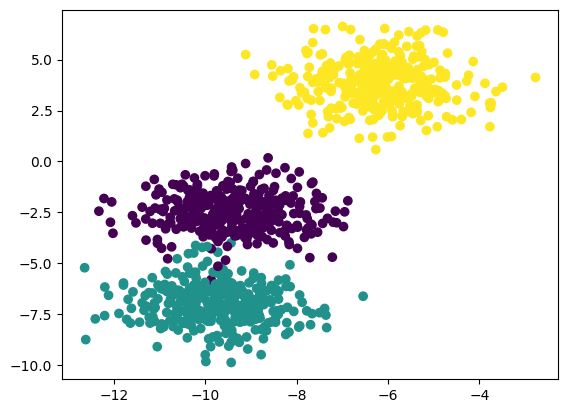

In [90]:
plt.scatter(X[:,0],X[:,1], c = y)


In [91]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.33, random_state=32)

In [92]:
from sklearn.cluster import KMeans

In [93]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init = 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [94]:
wcss

[16274.121381977555,
 3665.9251819359756,
 1309.0133085347024,
 1158.9270278645388,
 1058.3638069856909,
 854.2774576606032,
 767.7153049991291,
 648.0693929186716,
 573.7373784436174,
 585.4926385544801]

Text(0, 0.5, 'wcss')

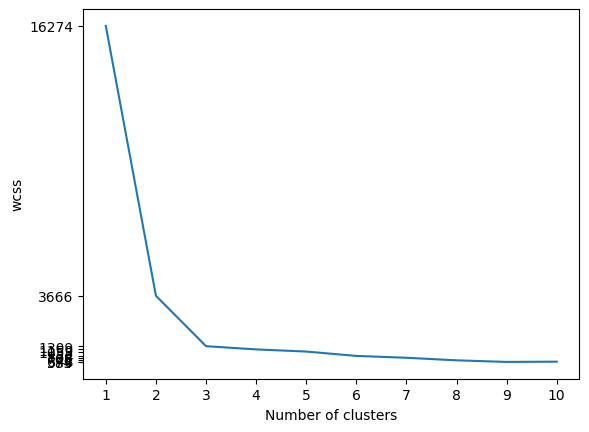

In [95]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.yticks(wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

In [113]:
k_means = KMeans(n_clusters=3)

In [103]:
# k_means.labels_

In [114]:
y_labels = kmeans.fit_predict(X_train)

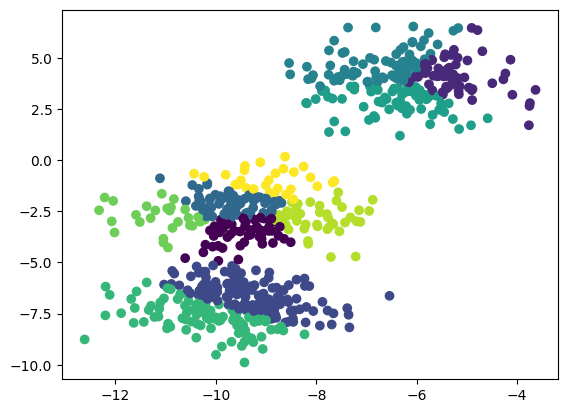

In [115]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_labels)

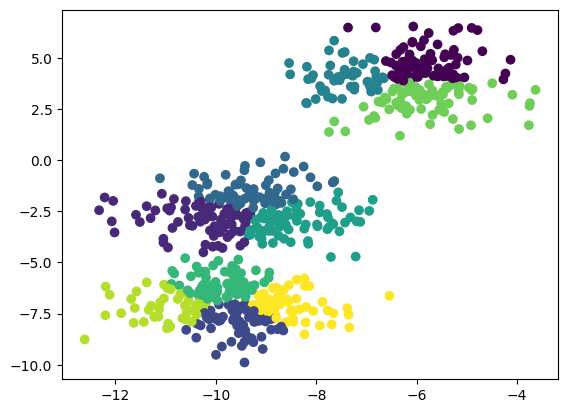

In [111]:
plt.scatter(X_train[:,0],X_train[:,1], c = y_labels)

In [101]:
from kneed import KneeLocator

ModuleNotFoundError: No module named 'kneed'

In [ ]:
k1 = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')

In [ ]:
k1.elbow

2

In [ ]:
from sklearn.metrics import silhouette_score